# Web scraping and data analysis 

In [3]:
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests

### Understanding the website and getting data
broncoathletics.com

In [4]:
url = "https://broncoathletics.com/sports/mens-soccer/stats/2022"
#html = requests.get(url)

html = requests.get(url).content
soup = bs(html)
df = pd.read_html(url)[0][:8]

In [5]:
df["Cal Poly Pomona"][1]

'37'

In [16]:
html = requests.get(url).content
soup = bs(html)
data = []
for x in range (2012, 2023):
    url = f"https://broncoathletics.com/sports/mens-soccer/stats/{x}"
    if x == 2020:
        continue
    else:
        data.append({x: pd.read_html(url)[0][:8]})
data[0]

{2012:                         Statistic Cal Poly Pomona Opponents  OPP
 0                           Shots           Shots          Shots
 1                        Goals  G              18             28
 2           Goals Per Game  G/AVG            1.06           1.65
 3                       Shots  SH             186            229
 4          Shots Per Game  SH/AVG            10.9           13.5
 5           Shots Percentage  SH%           0.097          0.122
 6              Shots On Goal  SOG          69-186         82-229
 7  Shots On Goal Percentage  SOG%           0.371          0.358}

### Season record 

In [14]:

columns = ["Year", "Wins", "Losses", "Ties"]
dataframe = []

for x in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]:
    url = f"https://broncoathletics.com/sports/mens-soccer/stats/{x}"
    html = requests.get(url).content
    soup = bs(html)

    
    wins = pd.read_html(url)[5]
    win_counts = wins["W/L"].value_counts()
    
    wins_count = win_counts.get('W', 0)
    losses_count = win_counts.get('L', 0)
    ties_count = win_counts.get('T', 0)
    
    # Append the data to the list
    dataframe.append([x, wins_count, losses_count, ties_count])

# Create a DataFrame
record = pd.DataFrame(dataframe, columns=columns)
record

,Year,Wins,Losses,Ties
0,2012,3,11,3
1,2013,7,7,4
2,2014,17,1,2
3,2015,17,3,3
4,2016,13,6,3
5,2017,17,6,1
6,2018,17,7,0
7,2019,12,5,3
8,2021,14,5,4
9,2022,11,3,6


In [15]:
record.set_index("Year", inplace=True)

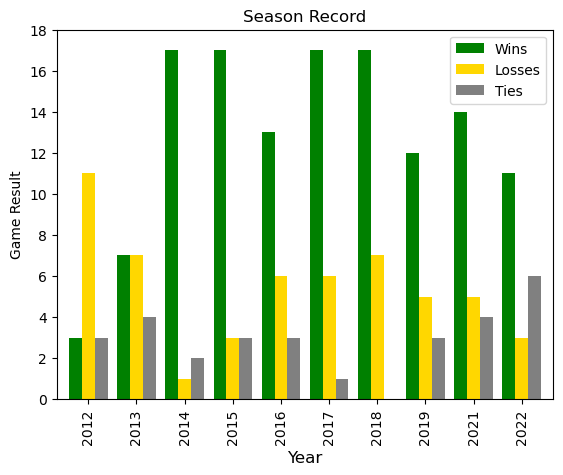

In [12]:
import matplotlib.pyplot as plt

record.plot(kind="bar", color=["green", "gold", "gray"], width=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Game Result')
plt.title('Season Record')
plt.ylim(0,18)# Show the plot

plt.show()


# Looking at stats

In [17]:
# ratio of goals per shot
goal_per_shot = []
for year_data in data:
    year = list(year_data.keys())[0]
    stats = year_data[year]
    goal_per_shot.append(stats["Cal Poly Pomona"][5])
goal_per_shot

['0.097',
 '0.107',
 '0.124',
 '0.134',
 '0.090',
 '0.169',
 '0.100',
 '0.152',
 '0.161',
 '0.123']

In [18]:
# Total number of goals for the opponents over a season
opp_goals = []
for year_data in data:
    year = list(year_data.keys())[0]
    stats = year_data[year]
    opp_goals.append(stats["Opponents  OPP"][1])
opp_goals

['28', '16', '10', '22', '14', '21', '26', '20', '24', '20']

In [19]:
# total number of goals for cpp over a season
cpp_goals = []
for year_data in data:
    year = list(year_data.keys())[0]
    stats = year_data[year]
    cpp_goals.append(stats["Cal Poly Pomona"][1])
cpp_goals

['18', '22', '35', '43', '25', '55', '38', '52', '53', '37']

In [20]:
# CPP goals per game in 2022
url = "https://broncoathletics.com/sports/mens-soccer/stats/2022"
html = requests.get(url).content
soup = bs(html)

season_goals = pd.read_html(url)[6]
season_goals = season_goals["G"][:20]     
pd.DataFrame(season_goals)
season_goals

0     1
1     2
2     2
3     1
4     3
5     3
6     0
7     3
8     3
9     2
10    1
11    1
12    2
13    4
14    3
15    4
16    1
17    0
18    0
19    1
Name: G, dtype: int64

In [21]:
season_goals.mean()

1.85

In [22]:
#Season goals 2021
url = "https://broncoathletics.com/sports/mens-soccer/stats/2021"
html = requests.get(url).content
soup = bs(html)

season_goals_21 = pd.read_html(url)[6]
season_goals_21 = season_goals_21["G"][:24]   
pd.DataFrame(season_goals_21)
season_goals_21

0      2
1      3
2      4
3      0
4      3
5      1
6      1
7      2
8      3
9      7
10     2
11     4
12     2
13     3
14     2
15     2
16     1
17     2
18     1
19     5
20     1
21     2
22     0
23    53
Name: G, dtype: int64

In [23]:
# Shots per game for CPP
shot_per_game = []
for year_data in data:
    year = list(year_data.keys())[0]
    stats = year_data[year]
    shot_per_game.append(stats["Cal Poly Pomona"][4])
shot_per_game

['10.9',
 '11.4',
 '14.2',
 '14.0',
 '12.6',
 '13.6',
 '15.8',
 '17.2',
 '14.3',
 '15.0']

### Goals per shot 

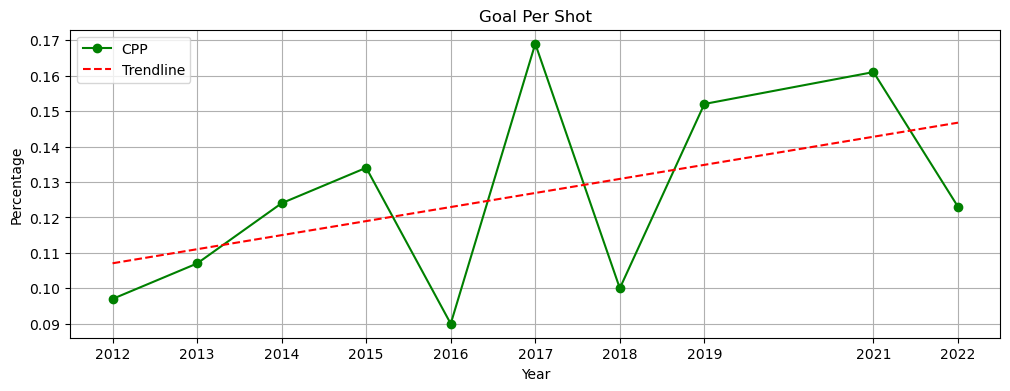

In [25]:
goal_per_shot 
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Convert the values to numeric (if they are not already)
values = [float(val) for val in goal_per_shot]

# Create a line plot
plt.figure(figsize = (12,4))
coefficients = np.polyfit(years, values, 1)
trendline = np.poly1d(coefficients)

plt.plot(years, values, marker='o', linestyle='-', color="green", label="CPP")
plt.plot(years, trendline(years), label='Trendline', linestyle='--', color='red')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Goal Per Shot')
plt.xticks(years)
plt.legend()
# Show the plot
plt.grid(True)
plt.show()

### Goals per game 2022 

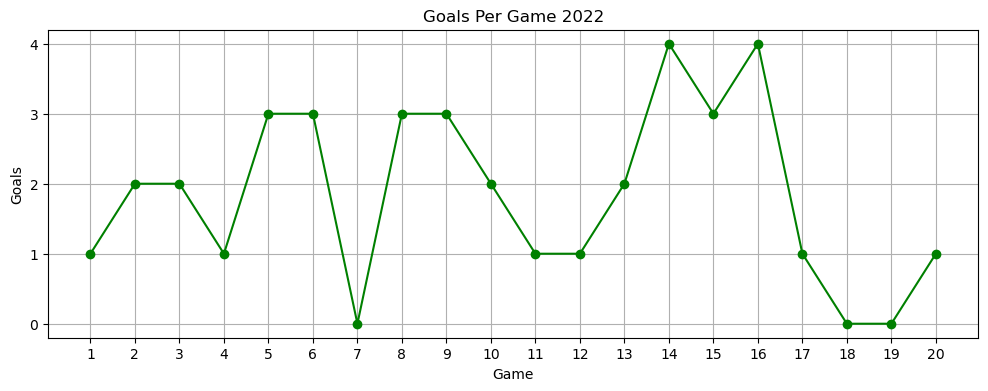

In [26]:

plt.figure(figsize=(12,4))
plt.plot(season_goals.index +1, season_goals, marker='o', linestyle='-', color="green")
plt.xlabel('Game')
plt.ylabel('Goals')
plt.title('Goals Per Game 2022')
plt.xticks(range(1,21))
plt.yticks(range(int(min(season_goals)), int(max(season_goals)) + 1))
# Show the plot
plt.grid(True)
plt.show()

### shots per game and total goals

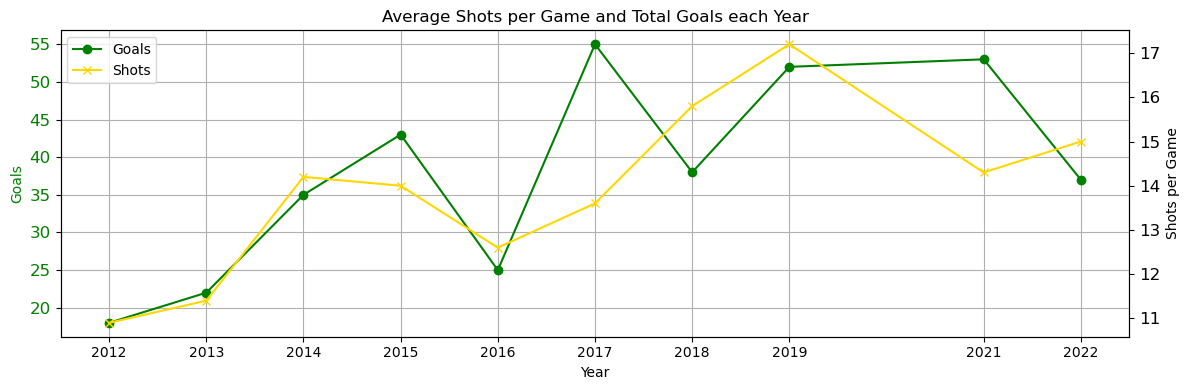

In [27]:
import matplotlib.pyplot as plt
shot_per_game
cpp_goals
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Convert the values to numeric (if they are not already)

cpp_goals = [int(val) for val in cpp_goals]
shot_per_game = [float(val) for val in shot_per_game]
# Create a line plot
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

ax1.plot(years, cpp_goals, marker='o', linestyle='-', color="green", label="Goals")
ax1.set_ylabel('Goals', color="green")
ax1.tick_params(axis='y', labelcolor="green",  labelsize = '12')
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(years, shot_per_game, marker='x', linestyle='-', color="gold", label="Shots")
ax2.set_ylabel("Shots per Game", color="black")
ax2.tick_params(axis='y', labelcolor="black", labelsize = '12')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

# Display a single legend for both axes
ax1.legend(lines, labels, loc="upper left")

# Set x-axis ticks to match years
ax1.set_xticks(years)


# Add labels and a title
ax1.set_xlabel('Year')
ax1.set_title('Average Shots per Game and Total Goals each Year')
ax1.set_xticks(years)


# Show the plot
plt.tight_layout()
plt.show()


# Goal difference each year

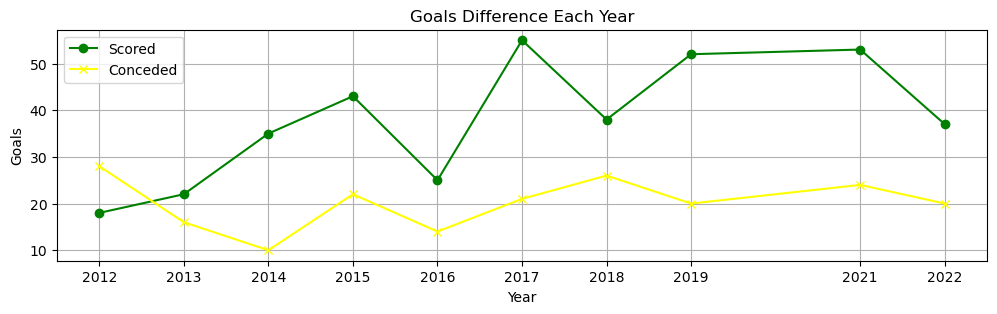

In [106]:
import matplotlib.pyplot as plt
opp_goals
cpp_goals
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]

# Convert the values to numeric (if they are not already)
cpp_goals = [int(val) for val in cpp_goals]
opp_goals = [int(val) for val in opp_goals]
# Create a line plot
plt.figure(figsize = (12,3))
plt.plot(years, cpp_goals, marker='o', linestyle='-', color="green", label="Scored")
plt.plot(years, opp_goals, marker='x', linestyle='-', color="yellow", label="Conceded")

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Goals')
plt.title('Goals Difference Each Year')
plt.xticks(years)
# Show the plot
plt.grid(True)
plt.legend()
plt.show()


### Top scorers last 10 years

In [29]:
import re
import numpy as np

columns = [i.text for i in soup.select("table > thead > tr:nth-child(1) > th")][3:17]
scorer = pd.DataFrame(columns=columns)

for x in [2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]:
    url = f"https://broncoathletics.com/sports/mens-soccer/stats/{x}"
    
    html = requests.get(url).content
    soup = bs(html)
    player = [i.text for i in soup.select("table > tbody > tr:nth-child(1)")][1:2]
        
                
    pattern1 = r'\\n\\n'
    replacement1 = r'\\n'
    step1_result = re.sub(pattern1, replacement1, str(player))
        
# Step 2: Replace '\\n' with ','
    pattern2 = r'\\n'
    replacement2 = ','
    final_result = re.sub(pattern2, replacement2, step1_result)


    temp = final_result
    temp = temp.replace("[", "").replace("]", "").split(",")

    to_remove = [0, 3, 4, 5, 19, 20, 18]
    values = [x for i, x in enumerate(temp) if i not in to_remove]
    
    
    row_to_append = pd.Series(values, index=scorer.columns)
    scorer= pd.concat([scorer, row_to_append.to_frame().T], ignore_index=True)
scorer

,#,Player,GP,GS,MIN,G,A,PTS,SH,SH%,SOG,SOG%,YC-RC,GW
0,7,Henschke,20,15,1342,6,5,17,51,0.118,21,0.412,2-0,2
1,17,Henschke,23,22,1527,13,3,29,60,0.217,29,0.483,3-0,2
2,10,Villalobos,20,20,1622,18,6,42,75,0.240,37,0.493,0-0,5
3,10,Villalobos,23,23,2023,9,1,19,66,0.136,28,0.424,3-0,3
4,10,Monso,24,24,1978,21,11,53,89,0.236,38,0.427,6-0,8
5,10,Monso,22,20,1522,12,4,28,62,0.194,32,0.516,1-0,7
6,3,Gonzalez Diaz,22,22,1852,13,5,31,60,0.217,25,0.417,1-0,2
7,3,Gonzalez Diaz,20,11,1130,10,3,23,43,0.233,21,0.488,1-0,4
8,9,Cortez,18,16,1195,6,4,16,40,0.150,16,0.400,0-0,2
9,10,Gomez,16,16,1172,5,4,14,30,0.167,12,0.400,5-0,3


In [30]:
columns_to_drop = ["GS", "MIN", "GW", "YC-RC", "SOG%", "SOG"]
scorer = scorer.drop(columns=columns_to_drop)
scorer

,#,Player,GP,G,A,PTS,SH,SH%
0,7,Henschke,20,6,5,17,51,0.118
1,17,Henschke,23,13,3,29,60,0.217
2,10,Villalobos,20,18,6,42,75,0.240
3,10,Villalobos,23,9,1,19,66,0.136
4,10,Monso,24,21,11,53,89,0.236
5,10,Monso,22,12,4,28,62,0.194
6,3,Gonzalez Diaz,22,13,5,31,60,0.217
7,3,Gonzalez Diaz,20,10,3,23,43,0.233
8,9,Cortez,18,6,4,16,40,0.150
9,10,Gomez,16,5,4,14,30,0.167


In [35]:
scorer["PTS"] = scorer["PTS"].astype(int)
print(f'Points mean:{scorer["PTS"].mean()}')
print(f'Goals mean: {scorer["G"].mean()}')

Points mean:27.2
Goals mean: 613189211213106.5


In [40]:
scorer.loc[scorer["PTS"] > scorer["PTS"].mean()]

,#,Player,GP,G,A,PTS,SH,SH%
1,17,Henschke,23,13,3,29,60,0.217
2,10,Villalobos,20,18,6,42,75,0.240
4,10,Monso,24,21,11,53,89,0.236
5,10,Monso,22,12,4,28,62,0.194
6,3,Gonzalez Diaz,22,13,5,31,60,0.217
